In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('F:/Personal/AI_DS_ML/DATASETS/boston.csv')
df


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


##CRIM - Per capita crime rate by town.

ZN - Proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - Proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise).

NOX - Nitric oxides concentration (parts per 10 million) [parts/10M].

RM - Average number of rooms per dwelling.

AGE - Proportion of owner-occupied units built prior to 1940.

DIS - Weighted distances to five Boston employment centers.

RAD - Index of accessibility to radial highways.

TAX - Full-value property-tax rate per  10,000[
 /10k].

PTRATIO - Pupil-teacher ratio by town.

B - Result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

LSTAT - Percentage of lower status of the population.

MEDV - Median value of owner-occupied homes in  1000′s[k
 ].

In [4]:
#Check for the null values
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

# Data preproccessing and Feature Scaling

In [5]:
#Extract feature and target
x = df.drop('medv',axis=1)
y=df['medv']

In [6]:
from sklearn.model_selection import train_test_split

In [14]:
#Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [16]:
scaler=StandardScaler()

In [20]:
x_train_scaled=scaler.fit_transform(x_train)

In [31]:
x_test_scaled=scaler.transform(x_test)

# |Cross Validation

Cross-validation is a technique to assess a model's performance by splitting the dataset into multiple subsets (folds)training the model on a combination of these subsets, and testing it on the remaining fold.It helps estimate how well a model generalizes tounseen dataaids in selecting a optimal hyperparametersimproving the reliability oflinear regression predictions

In [32]:
# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [35]:
# Perform cross-validation
cv_predictions = lr.predict(x_test_scaled)
cv_mse = mean_squared_error(y_test, cv_predictions)
print(f"Cross-Validation Mean Squared Error: {cv_mse:.4f}")

Cross-Validation Mean Squared Error: 24.4978


In [36]:
# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, cv_predictions)
print(f"R-squared: {r2:.4f}")

R-squared: 0.6659


# |Mean Square Error(or)Root Mean Square Error

These metrics measure the verage squared or square rootof the differences between predicted and actual values.They provide an overall indication of prediction accuracy

Useful when you want to quantify how well your model's predictions align with the actual values.Both MSE and RMSE are sensitive to larger errors, which could be important for a housing price predictions.

|R Square

R-squared indicates the proportions of variance in the target variable (MEDV)that can be explained by the independent variables. It helps assess how well your model fits the data.

Useful when you want to understand how much of the variability median home values your model is capturing.A higher R-squared indicates a better fit

In [40]:
#Creating dataframe for actual and predicted values
df = pd.DataFrame({
    'Actual Values':y_test.values,
    'Predicted Values':cv_predictions
})

In [42]:
df.head(15)

,Actual Values,Predicted Values
0,23.6,28.973354
1,32.4,35.877958
2,13.6,13.973662
3,22.8,25.615840
4,16.1,18.666082
5,20.0,23.644660
6,17.8,17.059712
7,14.0,14.526449
8,19.6,22.794028
9,16.8,19.606188


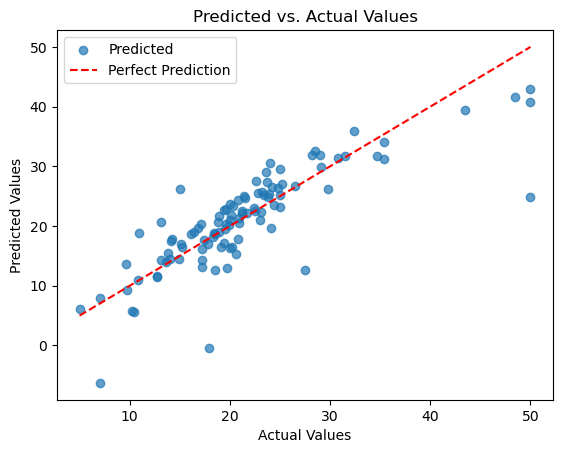

In [51]:
#Creating a scatter plot of the linear Regression Line
plt.scatter(y_test,cv_predictions,alpha=0.7,label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

I'm excited to share my initial exploration into house price prediction using a baseline linear regression model. This model takes into account various features like crime rate, property tax, and more to predict the median value of owner-occupied homes.

# |Key Takeways:

The baseline linear regression model provides a solid foundation for predicting house prices.

Features such as average number of rooms, pupil-teacher ratio, and more play a crucial role in predicting home values..

While this model is just a starting point, it serves as a stepping stone to more sophisticated techniques.
|Performance Metrics:

Mean Squared Error (MSE)[24.2911].

R-squared (Coefficient of Determination) [0.6688].